# Airbnb Data Analyze

This is a project for analyzing airbnb data in Seattle.

## Questions: 
* What time of year has the highest rental prices ?
* What factors have an influence on booking price ? 
* What aspects correlate well to host earnings ?
* How well can we predict an host price ?

## CRISP-DM process
**1. Business Understanding**

   Seattle airbnb calendar dataset is available from Kaggle https://www.kaggle.com/airbnb/seattle/data#calendar.csv This dataset includes listing id and the price and available for that day. Seattle Airbnb listing dataset is available from Kaggle https://www.kaggle.com/airbnb/seattle/data#listings.csv This dataset includes full descriptions and average review score for listed places. Before starting data analysis, I define objective to get better knowledge about influential factors on price, like calendar, amnentities and locations. Therefore, I define three bussiness questions before starting analysis:
   1. What time of year has the highest rental prices ?  
   
   
   2. What factors have an influence on booking price ?  
   
   
   3. What aspects correlate well to host earnings ?  


**2. Data Understanding**  

   **Seattle Airbnb Calendar Data**  
   
   It has 1,393,570 rows and 4 columns representing price and available of related day. Listing_id column is integer, other columns are object data type. Approximately 33% of price column is nan value. Other columns have no nan values.  
   
   **Seattle Airbnb Listing Data**  
   
   It has 3818 rows and 92 columns representing listing attributes. 47 columns have nan data. After checking nan values in dataset; there were two columns having more than 75% nan data. These columns are "license" and "square_feet". Furthermore, I also checked data type distribution of columns. We can say that 1/3 of dataset are numerical(float and integer).  
   
   Results: 1.Object data type: 62 columns 2.float64 data type 3.int64 data type: 13 columns.  
   
   There were 62 object type columns (approximately 2/3 of dataset). Furthermore, data types of some columns were not properly defined. For instance; some price columns are set as object instead float or integer.  
   
**3. Data Preparation** 

   For Seattle Airbnb Calendar Dataset, first of all data types of columns are fixed. Data type of price column is changed from object to float. Then, price columns has missing values (approximately 33%). I have filled these missing data with mode of price before starting data analysis. (Data Imputation)  
   
   For Seattle Airbnb Listing Dataset, I change host_since datetime data to host_since_year. Because I want to see number of hosts change through sevaral years, not day by day. I also use amenities and some category column to add corresponding catogarical dummy columns. I have filled nan values of review_scores_rating and so on with median value before starting data analysis.  

**4. Data Modeling**  
   I have used LinearRegression and train_test_split methods to design model and predict price.  

**5. Evaluation**  
   I used 212 variables which may impact on predicting price, many of them are categorical columns. R-squared value of my model is 0.65 which is not too high. According to my model, host_is_superhost, host_response_time, property_type, cancellation_policy, instant_bookable, host_response_rate and so on have impact while predicting price in Seattle Airbnb Data.  
  
**6. Deployment**  
   Results are summarized in the Medium data science post.
   

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import ast
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [293]:
listings_df = pd.read_csv("input/airbnb_seattle/listings.csv")
calendar_df = pd.read_csv("input/airbnb_seattle/calendar.csv")

## Explore and clean data

In [294]:
print(listings_df.columns)
display(listings_df.head())

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [295]:
print(calendar_df.columns)
display(calendar_df.head())

Index(['listing_id', 'date', 'available', 'price'], dtype='object')


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [296]:
calendar_df.isna().mean()*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [297]:
#list percentage of missing data on each column of listings.csv data
listing_missing_df = listings_df.isna().mean()*100
listing_missing_df = listing_missing_df[listing_missing_df > 0]
print(type(listing_missing_df))
print(listing_missing_df.sort_values(ascending=False))

<class 'pandas.core.series.Series'>
license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
reviews_per_month               16.422211
first_review                    16.422211
last_review                     16.422211
space                           14.903091
host_response_time              13.69827

In [298]:
listings_df.select_dtypes(include='number').shape[1]

30

In [299]:
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [300]:
#drop columns have too much missing data and useless
listings_df.drop(columns=['license', 'square_feet', 'monthly_price', 'security_deposit',
                         'weekly_price', 'notes', 'neighborhood_overview', 'cleaning_fee',
                         'transit', 'host_about'], inplace=True)

In [301]:
#list percentage of missing data on each column of calendar.csv data
calendar_missing_df = calendar_df.isna().mean()*100
calendar_missing_df = calendar_missing_df[calendar_missing_df > 0]
print(calendar_missing_df.sort_values(ascending=False))

price    32.938998
dtype: float64


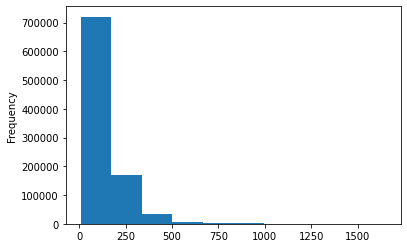

In [303]:
def create_dummy_df(df, cat_cols, dummy_na=False, drop_first=True):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        df = pd.concat(
            [
                df.drop(columns=col),
                pd.get_dummies(df[col], prefix=col, dummy_na=dummy_na, drop_first=drop_first)
            ],
            axis=1
        )
    return df


def create_series_str_dummy(df, cat_cols):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        df = pd.concat(
            [
                df.drop(columns=col),
                df[col].str.get_dummies().rename(columns=lambda x: col + '_' + x)
            ],
            axis=1
        )
    return df


def convert_bool_data(df, cols):
    '''
    INPUT:
    df - pandas dataframe with bool variables you want to convert
    cols - list of strings columns that are associated with string of t or f, which means True or False
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. use boolean variable to replace t or f 
    '''
    for col in cols:
        df.loc[:, col] = df[col].map(lambda x: True if x == 't' else False)
    return df


def convert_percent_data(df, cols):
    '''
    INPUT:
    df - pandas dataframe with percentage variable you want to convert
    cols - list of columns that strings are like e.g. 10%
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. use float to replace strings
    '''
    for col in cols:
        df.loc[:, col] = df[col].str.rstrip('%').astype(float) / 100.0
    return df

def convert_dollar_data(df, cols):
    '''
    INPUT:
    df - pandas dataframe with $ in string variable you want to convert
    cols - list of columns that strings are like e.g. 100,000$
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. use float to replace strings
    '''
    for col in cols:
            df.loc[:, col] = df[col].replace("[\$,]", "", regex=True).astype(float)
    return df


def clean_data(listings_df, calendar_df):
    '''
    INPUT
    listings_df - pandas dataframe containing listings data 
    calendar_df - pandas dataframe containing calendar data
    
    OUTPUT
    df - cleaned dataset, which contains merged tables:
    1. irrelevant columns are dropped;
    2. string containing dates are converted into numbers;
    3. columns, containing lists, are split into several columns (for example, amenities)
    4. missing values are imputed with mean or mode.
    '''
    #price is extremely right skewed, so fill mode is the best
    calendar_df = convert_dollar_data(calendar_df, ['price'])
    calendar_df['price'].plot.hist()
    calendar_df['price'].fillna(calendar_df['price'].mode(), inplace=True)
    #merge dataframe
    listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})
    df = pd.merge(calendar_df, listings_df, on = 'listing_id')
    
    #drop the irrelevant columns and columns with too much missing data
    columns_to_drop = ['available', 'host_id','host_location','host_neighbourhood',
                       'host_total_listings_count', 'calendar_updated', 'host_acceptance_rate',
                       'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                       'experiences_offered', 'street', 'neighbourhood', 'zipcode',
                       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
                       'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
                       'city', 'state', 'market', 'smart_location', 'country_code', 'country', 
                       'latitude', 'longitude', 'is_location_exact', 'has_availability', 'availability_30',
                       'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                       'first_review', 'last_review', 'requires_license', 'jurisdiction_names', 'price_y',
                       'reviews_per_month']
    df = df.drop(columns = columns_to_drop)
    
    #negligle number of nan values, so drop these rows
    df.dropna(subset=["bathrooms", "bedrooms", "beds"], inplace=True)
    for col in ["bathrooms", "bedrooms", "beds"]:
        df[col] = df[col].round(0).astype(int)

    #convert date from the calendar into month and year
    df['date'] = pd.to_datetime(calendar_df['date'])
    
    #remove rows where price_x == np.nan, because price will be used as response
    df = df.dropna(subset=['price_x'])
    
    df.rename(columns={'price_x':'price'}, inplace=True)
    
    #convert price object to float
    dollar_cols = ['price', 'extra_people']
    df = convert_dollar_data(df, dollar_cols)
    
    
    df['host_since_year'] = pd.to_datetime(df['host_since']).dt.year
    #fill mean is simple and only 2 of them are nan
    df['host_since_year'].fillna(df['host_since_year'].mean(), inplace=True)
    df['host_since_year'] = df['host_since_year'].astype(int)
    df.drop(columns='host_since', inplace=True)
    
    #0.05% of values are nan, fill mean do not introduce bias
    df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace=True)
    df['host_listings_count'] = df['host_listings_count'].round(0).astype(int)
    
    rate_cols = ['host_response_rate']
    df = convert_percent_data(df, rate_cols)
    
    #14% of values are nan, histogram is left skewed, median is more suitable than mean
    df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
    
    #fill catogary data with most frequency value
    df['host_response_time'].fillna(df['host_response_time'].value_counts().index[0], inplace=True)
    
    df['amenities'] = df['amenities'].map(lambda amns: '|'.join(
        [amn.replace("}", "").replace("{", "").replace('"', "") for amn in amns.split(',')]
    ))
    # only 2 of them are None, just drop it
    df.drop(df[df.host_verifications == 'None'].index, inplace=True)
    
    df['host_verifications'] = df['host_verifications'].map(
        lambda x_list: '|'.join([x for x in ast.literal_eval(x_list)])
    )
    
    for col in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                "review_scores_checkin", "review_scores_communication", "review_scores_location",
                "review_scores_value"]:
        #all of columns are left skewed
        df[col].fillna(df[col].median(), inplace = True)
    
    bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']
    # these columns have little nan variables, they are fine to drop without change the result
    df.dropna(subset=bool_cols, inplace=True) 
    df = convert_bool_data(df, bool_cols)
    
    return df

df = clean_data(listings_df, calendar_df)

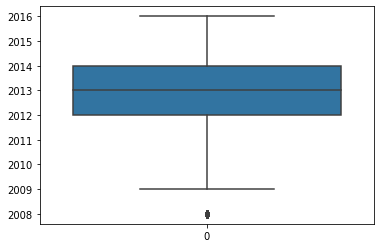

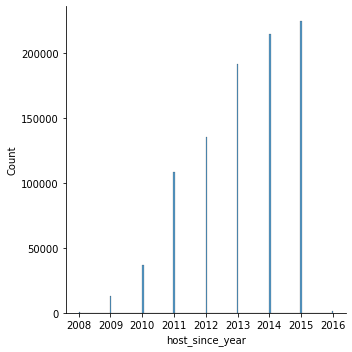

In [304]:
sns.boxplot(data=df['host_since_year'])
sns.displot(df['host_since_year'])

<AxesSubplot:>

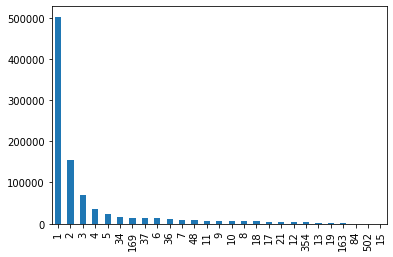

In [305]:
df['host_listings_count'].value_counts().plot.bar()

## What factors have an influence on booking price ?

In [306]:
pd.set_option('display.max_rows', 5000)

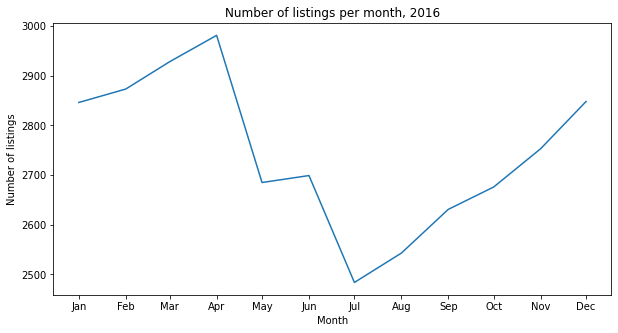

In [307]:
import matplotlib.dates as mdates

#find number of total number of listings for each month in 2016
number_of_listings_by_month = df[df['date'].dt.year == 2016].\
groupby(pd.Grouper(key='date', freq='MS'))['listing_id'].nunique().to_frame('id_count')

plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')
plt.show()

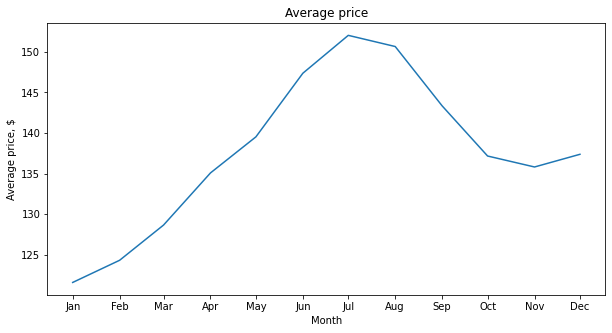

In [308]:
average_price_by_month = df[df['date'].dt.year == 2016].\
groupby(pd.Grouper(key='date', freq='MS'))['price'].mean().to_frame('average_price')

plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.show()

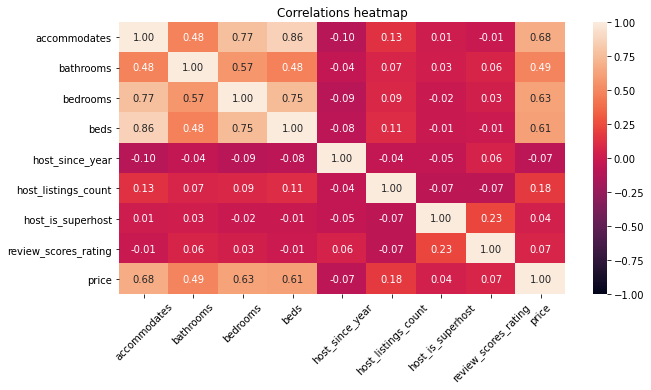

In [309]:
cols = ['accommodates', 'bathrooms', 'bedrooms','beds', 'host_since_year',
        'host_listings_count', 'host_is_superhost', 'review_scores_rating', 'price']

#Find out correlation between columns and plot
fig, ax = plt.subplots(figsize=(10,5))
heatmap = sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, fmt = '.2f', 
                      annot=True, ax=ax)
heatmap.set_title('Correlations heatmap')
plt.xticks(rotation = 45)
plt.show()

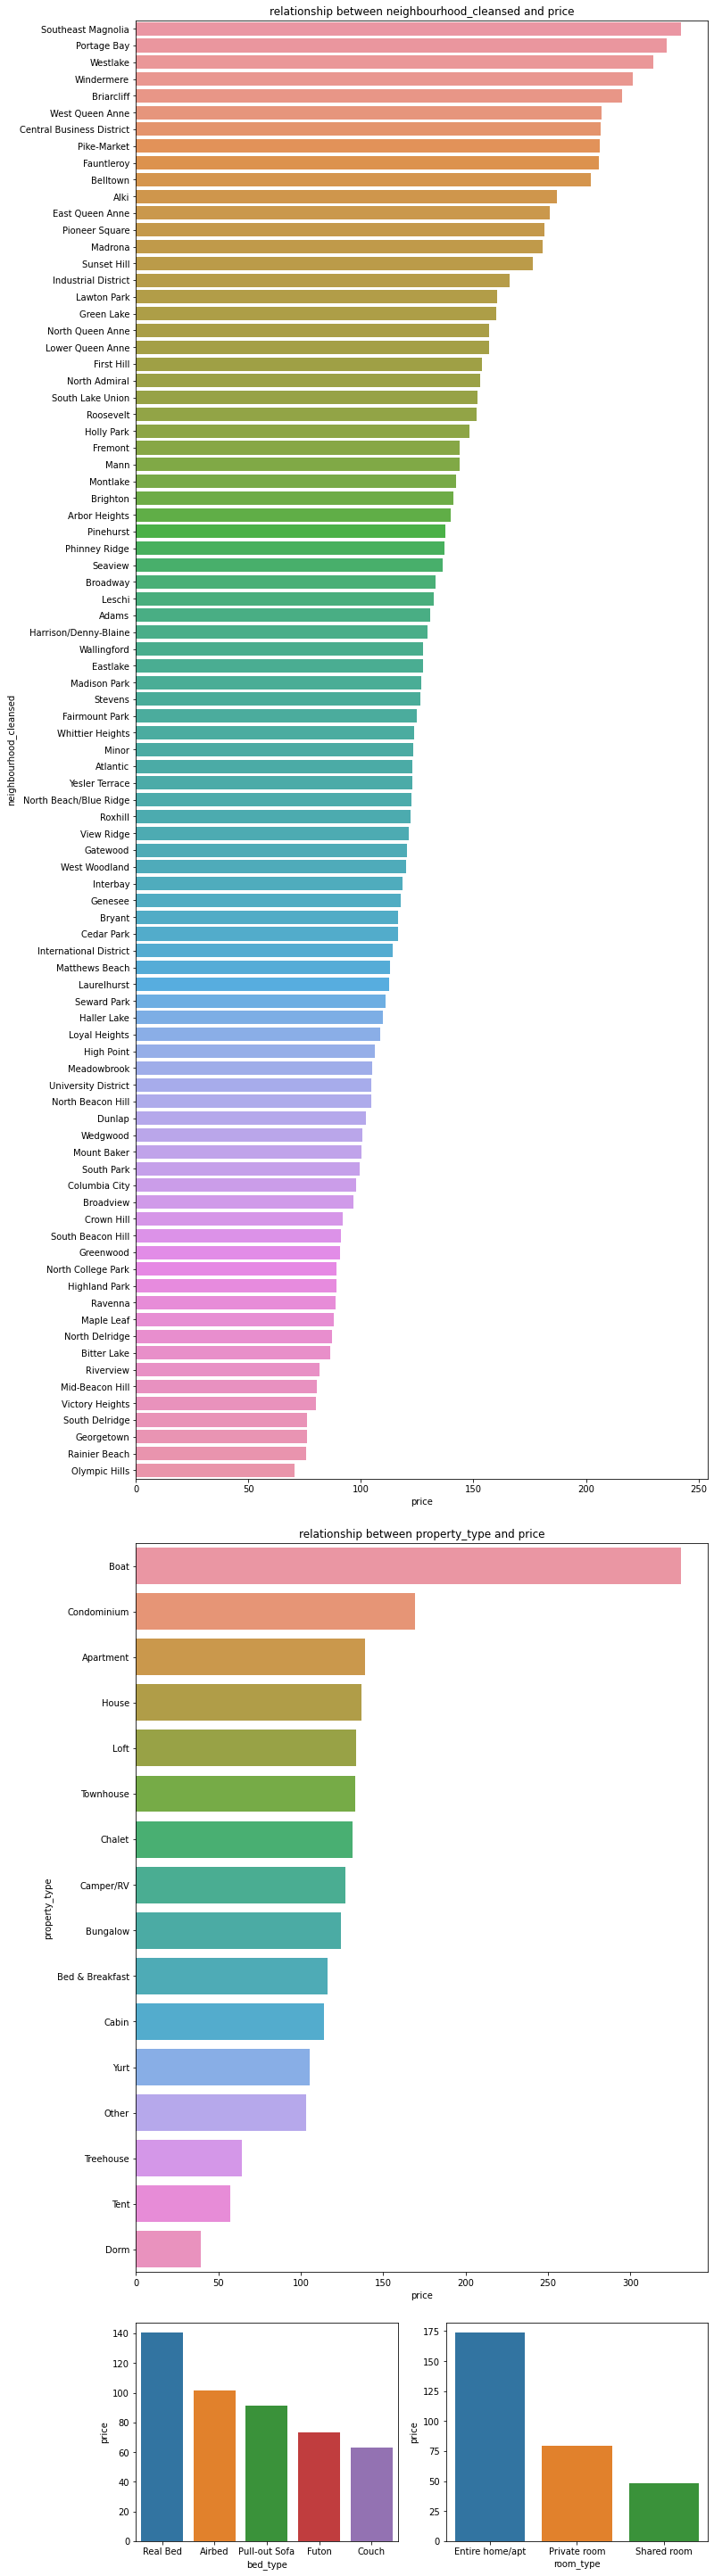

In [310]:
def plot_price_by_cat(df, x, y, colname, ax):
    '''
    INPUT
    df - pandas dataframe containing listings data 
    x - x axis of bar plot
    y - y axis of bar plot
    colname - column of df
    ax - Axes objects of plot
    
    OUTPUT
    a bar plot of different category sort by price 
    '''
    price_col = df.groupby(colname)['price'].mean().to_frame()
    price_col.reset_index(inplace=True)
    sns.barplot(x=x, y=y, data=price_col.sort_values(by='price', ascending=False), ax=ax)


df = df[df['price'].notnull()]
# fig, ax = plt.subplots(3, 2, figsize=(11, 40), gridspec_kw={'height_ratios':[2,1,1]})
fig = plt.figure(constrained_layout=True, figsize=(11, 40))
gs = fig.add_gridspec(3, 2, height_ratios=[2, 1, 0.3])

colname = 'neighbourhood_cleansed'
f_ax1 = fig.add_subplot(gs[0, :])
f_ax1.set_title("relationship between neighbourhood_cleansed and price")
plot_price_by_cat(df, x='price', y=colname, colname=colname, ax=f_ax1)

colname = 'property_type'
f_ax2 = fig.add_subplot(gs[1, :])
f_ax2.set_title("relationship between property_type and price")
plot_price_by_cat(df, x='price', y=colname, colname=colname, ax=f_ax2)

colname = 'bed_type'
f_ax3 = fig.add_subplot(gs[2, 0])
plot_price_by_cat(df, x=colname, y='price', colname=colname, ax=f_ax3)

colname = 'room_type'
f_ax4 = fig.add_subplot(gs[2, 1])
plot_price_by_cat(df, x=colname, y='price', colname=colname, ax=f_ax4)

plt.show()

count    927644.000000
mean        137.971272
std         105.286135
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64


<AxesSubplot:>

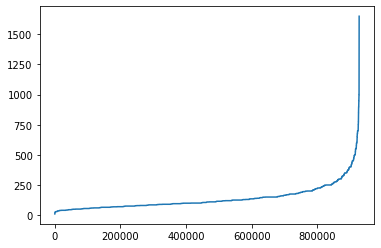

In [311]:
print(df['price'].describe())
df['price'].sort_values().reset_index(drop=True).plot()

price has some extremely high-value, that's hard to rent, unrealistic price
exploring price show **prices <= 250** is reasonable

## Predict price

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [313]:
df_rentalhouse = df.query("price <= 250").copy()
cols = ['amenities', 'host_verifications']
df_rentalhouse = create_series_str_dummy(df_rentalhouse, cols)
#create new categorical columns
category_columns = ['property_type', 'room_type', 'bed_type', 'host_response_time', 'neighbourhood_cleansed',
                    'cancellation_policy', 'neighbourhood_group_cleansed']
df_rentalhouse = create_dummy_df(df_rentalhouse, category_columns)
df_rentalhouse['date'] = df_rentalhouse['date'].map(dt.datetime.toordinal)
y = df_rentalhouse['price']
X = df_rentalhouse.drop(columns='price')
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm_model = LinearRegression(normalize=True)

In [314]:
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)

In [315]:
print("The r-squared score of test data is {}".format(r2_score(y_test, y_test_preds)))
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test, y_test_preds))))

The r-squared score of test data is 0.6474685869529963
RMSE is 31.258528769659744


## What aspects correlate well to host earnings?

In [316]:
from fancyimpute import IterativeImputer 


def draw_histograms(df, cols, n_rows, n_cols):
    '''
    INPUT
    df - pandas dataframe containing listings data 
    cols - columns of df
    n_rows - number of rows of histogram grid
    n_cols - number of columns of histogram grid
    
    OUTPUT
    several hist plot list in a grid
    '''
    fig=plt.figure(figsize=(20, 30))
    for i, col in enumerate(cols):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[col].hist(bins=10, ax=ax)
        ax.set_title(col + " hist")
    fig.tight_layout()
    plt.show()


df_new = listings_df.copy()

#clean data
cols = ['host_acceptance_rate', 'host_response_rate']
df_new = convert_percent_data(df_new, cols)
cols = ['host_is_superhost', 'instant_bookable', 'host_identity_verified', 'host_has_profile_pic']
df_new = convert_bool_data(df_new, cols)
cols = ['price', 'extra_people']
df_new = convert_dollar_data(df_new, cols)
cols = ['amenities', 'host_verifications']
for col in cols:
    df_new.loc[:, col] = df[col]
df_new = create_series_str_dummy(df_new, cols)
cols = ['property_type', 'room_type', 'bed_type', 'host_response_time', 'neighbourhood_cleansed',
        'cancellation_policy', 'neighbourhood_group_cleansed']
df_new = create_dummy_df(df_new, cols)

cols = ['review_scores_rating', 'number_of_reviews', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'review_scores_rating',
        'reviews_per_month', 'bathrooms', 'bedrooms', 'beds', 
        'host_response_rate', 'host_acceptance_rate']
mice_imputer = IterativeImputer()
df_new.loc[:, cols] = mice_imputer.fit_transform(df_new[cols])


df_new['total_score'] = (df_new['review_scores_rating'] * 0.01 * df_new['number_of_reviews']) \
                        / (df_new['review_scores_accuracy'] + df_new['review_scores_cleanliness'] \
                          + df_new['review_scores_checkin'] + df_new['review_scores_communication'] \
                          + df_new['review_scores_location'] + df_new['review_scores_value'])

top_boundary = df_new['total_score'].quantile(0.9)
low_boundary = df_new['total_score'].quantile(0.25)

In [317]:
df_new['total_score'].describe()

count    3818.000000
mean        0.362549
std         0.615440
min         0.000000
25%         0.029722
50%         0.144310
75%         0.428293
max         7.763793
Name: total_score, dtype: float64

In [318]:
df_corr = df_new.copy()
df_corr = df_corr.drop(columns=['review_scores_rating', 'number_of_reviews', 'review_scores_accuracy',
                                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                'review_scores_location', 'review_scores_value', 'review_scores_rating',
                                'reviews_per_month', 'host_id', 'id', 'scrape_id'
                               ])

In [319]:
corr_matrix = df_corr.corr().unstack().sort_values(ascending=False)
corr_matrix['total_score'][1:]

host_is_superhost                                   0.264661
host_response_time_within an hour                   0.157567
property_type_Cabin                                 0.138814
cancellation_policy_moderate                        0.129872
instant_bookable                                    0.122724
host_response_rate                                  0.110626
neighbourhood_cleansed_International District       0.109414
availability_90                                     0.104994
availability_60                                     0.098788
host_identity_verified                              0.098016
availability_365                                    0.094061
room_type_Private room                              0.076807
availability_30                                     0.074297
property_type_Loft                                  0.063808
neighbourhood_cleansed_Whittier Heights             0.061570
neighbourhood_cleansed_Harrison/Denny-Blaine        0.052028
extra_people            

In [320]:
df_top90 = df_new[df_new['total_score'] > top_boundary]
df_low25 = df_new[df_new['total_score'] < low_boundary]

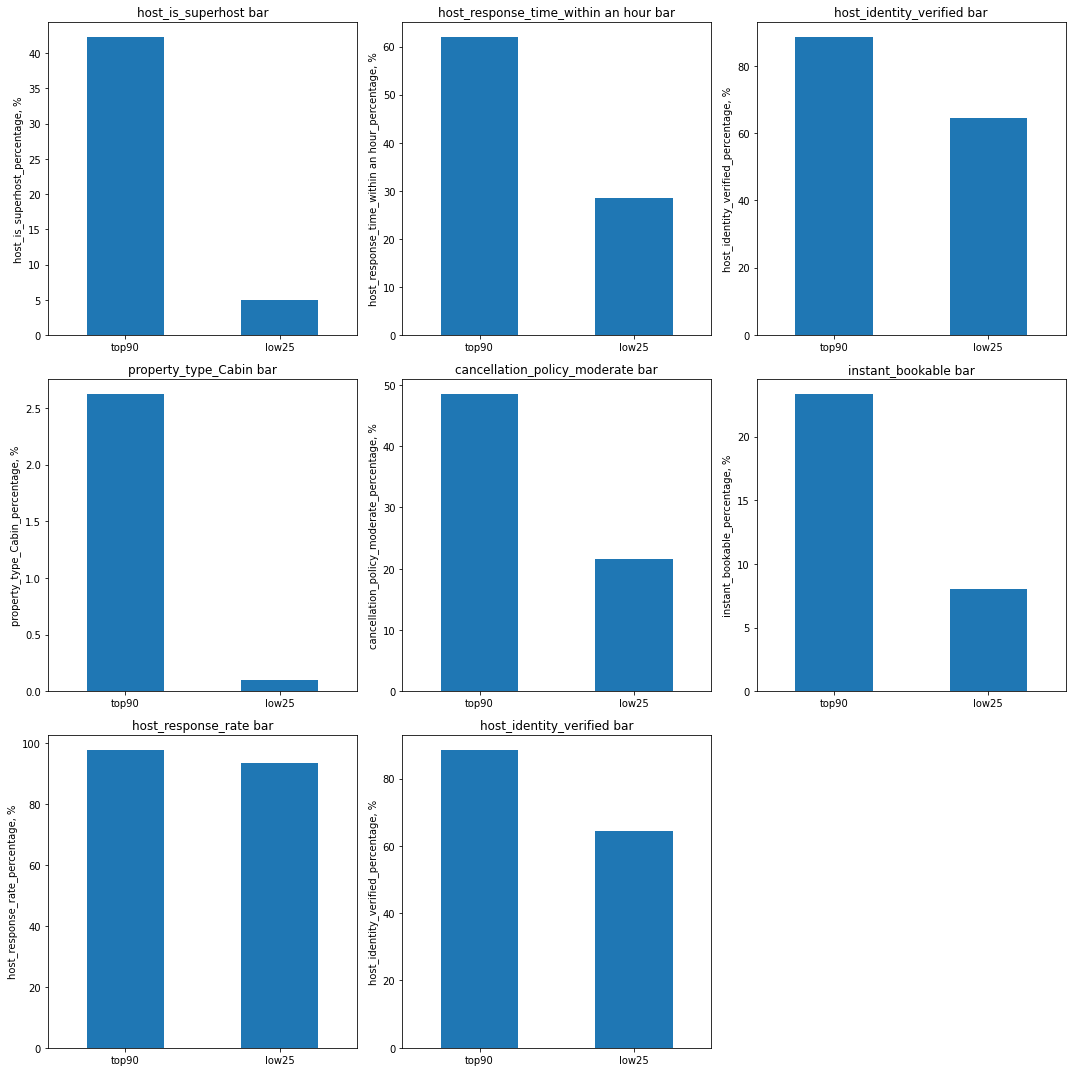

In [321]:
fig, axes = plt.subplots(figsize=(15, 15), nrows=3, ncols=3)
cols_to_plot = ['host_is_superhost', 'host_response_time_within an hour', 'host_identity_verified',
                'property_type_Cabin', 'cancellation_policy_moderate', 'instant_bookable',
                'host_response_rate', 'host_identity_verified']
for col, ax in zip(cols_to_plot, axes.flatten()):
    df_percentage = pd.DataFrame(
        index=['top90', 'low25'], 
        data=[
            df_top90[col].mean()*100, 
            df_low25[col].mean()*100
        ],
    )
    df_percentage.plot.bar(ylabel=col + '_percentage, %', rot=0, legend=False, ax=ax)
    ax.set_title(col + ' bar')
fig.delaxes(axes[2][2])
fig.tight_layout()
plt.show()